**PART 1 : CROSS SECTION DATA** 

In [2]:
#Importing libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import f
from statsmodels.stats.diagnostic import het_white
sns.set_style('dark')
from scipy.stats import t
import statsmodels.stats.api as sms
from statsmodels.tsa.stattools import grangercausalitytests

In [3]:
#Importing the dataset
col_names = ['price', 'crime', 'nox', 'rooms', 'dist', 'radial', 'proptax',
             'stratio','lowstat','lprice','lnox', 'lproptax']
df_hprices = pd.read_csv('HPRICE2.raw', header=None, delim_whitespace=True, names=col_names)
df_hprices.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678


**Question 1 : State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators
are unbiased.**


The fundamental hypothesis ensuring unbiased estimators is the Gauss-Markov Theorem:

The unobserved variables $ U $ have a mean of zero, i.e., $E(U) = 0 $

The observed variables $ X $ and the unobserved variables $U $ are uncorrelated, i.e., $ \text{Cov}(X, U) = 0 $.

We refer to omitted variable bias when one of the explanatory variables (a component of $ X $) correlated both with the explained variable and with the error term is not included in the equation. In this case, the fundamental hypothesis guaranteeing that the Ordinary Least Squares (OLS) estimators are unbiased is no longer valid.



**Question 2 : Show that under this assumption the OLS estimators are indeed unbiased**

We can consider thhis model :
Y = Xβ + ϵ
with Y represents the dependent variable, X the matrix of independent variables, β the vector of parameters to be estimated, and ε is the error term.

The OLS estimator for β, denoted as $\hat{β}$, is the solution to the minimization problem:
$min(β)$  $(Y−Xβ) ′(Y−Xβ)$

The first-order condition for this minimization problem is:

the first-order condition gives us : $-2X'Y + 2X'X\hat{β} = 0$

$\hat{\beta} = (X'X)^{-1} X'Y$

Now we consider the expected value of $\hat{β}$ :
$E(\hat{β}) = E((X'X)^{-1} X'Y) = (X'X^{-1}X'E(Y)$

but under the Gauss-Markov assumptions, E(ε)=0 and so E(Y)=Xβ

and the end $E(\hat{β}) = (X'X)^{-1}X'Xβ = β$

As we can see, the OLS estimators are unbiased under the assumptions of the Gauss-Markov theorem.

**Question 3 : Explain the sample selection bias with an example from the course**


When choosing a group of people for a study, it's crucial to ensure a proper randomization process. If not done correctly, biases can emerge, resulting in certain groups or individuals being underrepresented or excluded from the study due to flaws in the selection process.

The example from the course about the relationship between the growth rate and the size of businesses illustrates this biais. Empirical analyses showed a negative relationship between growth and the size of businesses. This means that, generally, smaller businesses tend to grow faster than larger ones. However, it's noted that only highly dynamic small businesses seem to stay in the market.

The selection bias comes into play here. This bias occurs when only the businesses that survived during the study period are considered, neglecting those that failed. This can lead to a distorted view of the relationship between growth and the size of businesses because the ones that failed, especially among the larger ones, are not taken into account.

**Question 4 : Explain the omitted variable bias with an example from the course**

Omitted variable bias happens when an important factor that should be considered in a regression model is left out. This omission can result in a distortion of the coefficients of one or more variables in the model. We talk about omitted variable bias when one of the explanatory variables (a component of $X$) is correlated both with the explained variable and with the error term and is not taken into account in the equation. In this case, the fundamental hypothesis guaranteeing that the Ordinary Least Squares (OLS) estimators are unbiased is no longer valid.

Let's look at the example from the course about how using fertilizers affects how much soybeans grow. Soybean growth depends on lots of things like the weather, the quality of the soil, and whether there are pests.

the experiment is picking different pieces of land, using different amounts of fertilizer, and then see how well the soybeans grow. When we analyze the data to see the connection between using fertilizers and soybean growth, there's a problem if we don't consider the initial quality of the soil.

The issue is that in this experiment, we don't directly look at how good the soil was at the beginning. If we always put more fertilizer on the pieces of land that were already good, it can mess up the real effect of the fertilizer on soybean growth because the starting soil quality is also really important. By leaving out the "soil quality" factor in the analysis, we introduce a bias into understanding how fertilizers affect soybean growth.


**Question 5 : Explain the problem of multicollinearity. Is it a problem in this dataset?**


Multicollinearity in regression poses significant challenges as it can elevate the variance of regression coefficients, leading to instability and complicating their interpretation. 
When variables are highly correlated, it becomes challenging to isolate individual effects, resulting in less reliable coefficient estimates. Moreover, if variables are collinear, then the matrix $X'X$ is not invertible, implying a lack of a unique solution for model parameters. To address these issues, it is advisable to identify and manage multicollinearity through strategies such as eliminating correlated variables, combining similar variables, or employing advanced techniques like regularization.

**Question 6 : Create three categories of nox levels (low, medium, high), corresponding to the following
percentiles: 0-25%, 26%-74%, 75%-100%**

In [4]:
# Define percentiles for categorization
low_percentile = 25
high_percentile = 75

# Calculate percentiles for NOx levels
low = df_hprices['nox'].quantile(low_percentile / 100)
high = df_hprices['nox'].quantile(high_percentile / 100)

# Create a new column 'nox_category' based on percentiles
df_hprices['nox_category'] = pd.cut(df_hprices['nox'], bins=[float('-inf'), low, high, float('inf')],
                            labels=['Low', 'Medium', 'High'], include_lowest=True)

df_hprices.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax,nox_category
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360,Medium
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938,Medium
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938,Medium
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678,Medium
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678,Medium


**Question 7 : Compute for each category of nox level the average median price and comment on your
results**

In [5]:
#Calculate the average median price for each nox category
average_prices = df_hprices.groupby('nox_category')['price'].mean()

print(average_prices)

nox_category
Low       26977.093750
Medium    22741.555118
High      17430.653226
Name: price, dtype: float64


We can see a correlation bewteen the average median price of a house and the level of nitrous oxide. The highest is the level of NOX, the cheapeast is the house.

**Question 8 : Produce a scatter plot with the variable price on the y-axis and the variable nox on the x-axis.
Is this a ceteris paribus effect?**

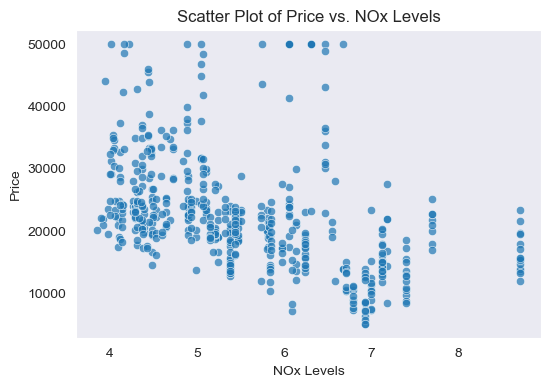

In [6]:
#Plotting the scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='nox', y='price', data=df_hprices, alpha=0.7)
plt.xlabel('NOx Levels')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. NOx Levels')
plt.show()


An ceteris paribus effect refers to the direct impact that one variable has on another variable while assuming that the remaining variables in the model remain constant and unchanged over time. In other words, a ceteris paribus approach simplifies the analytical process by assuming that only one variable influences another variable in the economic model. This technique allows for the isolation of effects from other events that might occur simultaneously.

However, the observed effect in our case does not appear to be a ceteris paribus effect since the other features are not held constant when plotting the correlation between features. Indeed in the scatter plot,for a given NOx Level, we have a large range of prices 
It means that other variables besides Nox Levels could directly influence the prices of the houses. For example, the geographic localisation, the neighborhood, the facilities near by, are elements that could also have a positive of negative influence on the price of a house. 



**Question 9 : Run a regression of price on a constant, crime, nox, rooms, proptax. Comment on the
histogram of the residuals. Interpret all coefficients.**



In [7]:
#OLS model
X = df_hprices[["crime", "nox", "rooms", "proptax"]]
X = sm.add_constant(X)
y = df_hprices["price"]
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.06e-91
Time:                        10:33:30   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

C:\Users\melin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


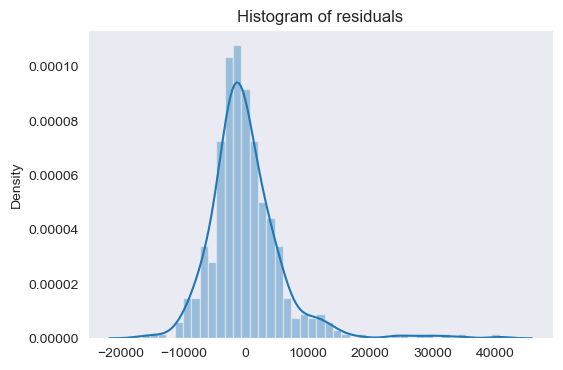

In [8]:
#Visualization of the residuals
plt.figure(figsize=(6,4))
sns.distplot(model.resid)
plt.title("Histogram of residuals")
plt.show()

The residuals seem to follow a centered normal distribution.

**Question 10 : Run a regression of lprice on a constant, crime, nox, rooms, proptax. Comment on the
histogram of the residuals. Interpret all coefficients.** 


In [9]:
#OLS model
X = df_hprices[["crime", "nox", "rooms", "proptax"]]
X = sm.add_constant(X)
y = df_hprices["lprice"]
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.50e-101
Time:                        10:33:31   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0

C:\Users\melin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


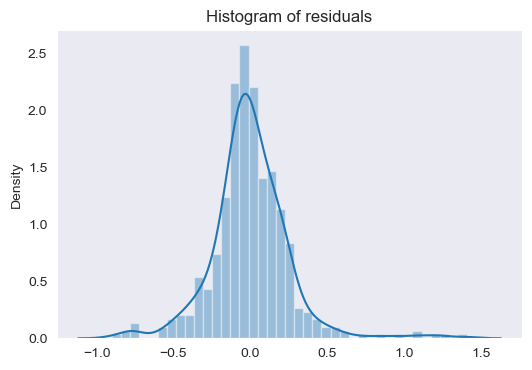

In [10]:
#Visualization of the residuals
plt.figure(figsize=(6,4))
sns.distplot(model.resid)
plt.title("Histogram of residuals")
plt.show()

The residuals seem to follow a centered normal distribution.

 **Question 11 : Run a regression of lprice on a constant, crime, lnox, rooms, lproptax. Comment on the
histogram of the residuals. Interpret all coefficients.**

In [11]:
#OLS model
X = df_hprices[["crime", "lnox", "rooms", "lproptax"]]
X = sm.add_constant(X)
y = df_hprices["lprice"]
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     197.4
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.77e-101
Time:                        10:33:32   Log-Likelihood:                -26.021
No. Observations:                 506   AIC:                             62.04
Df Residuals:                     501   BIC:                             83.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7505      0.253     38.476      0.0

C:\Users\melin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


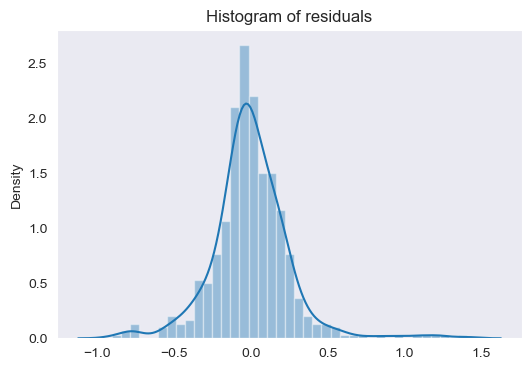

In [12]:
#Visualization of the residuals
plt.figure(figsize=(6,4))
sns.distplot(model.resid)
plt.title("Histogram of residuals")
plt.show()

The residuals seem to follow a centered normal distribution.

**Question 12 : In the specification of question 10, test the hypothesis H0: $\hat{β}_{nox} < 0$ vs. H1: $\hat{β}_{nox} > 0$ at the 1% level**

In [13]:
# OLS model
X = df_hprices[["crime", "nox", "rooms", "proptax"]]
X = sm.add_constant(X)
y = df_hprices["lprice"]
model = sm.OLS(y, X).fit()

# T-statistic for 'nox'
t_stat_nox = model.tvalues["nox"]

# Degrees of freedom of the model
deg_of_freedom = model.df_model

# Level of significance 
alpha = 0.01

# Calculation of t-critical value
t_critical = t.ppf(alpha, df=deg_of_freedom)

# We show the t-statistic and the t-critical value
print(f"T-statistic value : {t_stat_nox}")
print(f"T-critical value : {t_critical}")

# On compare la t-statistique et le t-critique
if t_stat_nox > t_critical:
    print("Reject the null hypothesis at the 1% level")
else:
    print("Fail to reject the null hypothesis at the 1% level")

T-statistic value : -3.5570290100073025
T-critical value : -3.7469473879811375
Reject the null hypothesis at the 1% level


**Question 13 : In the specification of question 10, test the hypothesis  H0: $\hat{β}_{nox} = 0$ vs. H1: $\hat{β}_{nox} \ne 0$ at the 1% level using the p-value of the test**

In [14]:
# Extract the p-value for 'nox'
p_value_nox = model.pvalues["nox"]

print(f"P-valeur : {p_value_nox}")

# Check if the p-value is less than alpha
alpha = 0.01

if p_value_nox < alpha:
    print("Reject the null hypothesis at the 1% level")
else:
    print("Fail to reject the null hypothesis at the 1% level")


P-valeur : 0.00041069590525890363
Reject the null hypothesis at the 1% level


**Question 14 : In the specification of question 10, test the hypothesis  H0: $\hat{β}_{nox} = \hat{β}_{proptax} $ at the 10% level**

In [15]:
# OLS model
X = df_hprices[["crime", "nox", "rooms", "proptax"]]
X["nox_proptax"] = df_hprices["nox"] + df_hprices["proptax"]
X = sm.add_constant(X)
y = df_hprices["lprice"]
model = sm.OLS(y, X).fit()

# Extract the p-value for 'nox_proptax'
p_value_nox_proptax = model.pvalues["nox_proptax"]

print(f"P-valeur : {p_value_nox_proptax}")

# Check if the p-value is less than alpha
alpha = 0.1

if p_value_nox_proptax < alpha:
    print("Reject the null hypothesis at the 10% level")
else:
    print("Fail to reject the null hypothesis at the 10% level")


P-valeur : 6.280190188473237e-05
Reject the null hypothesis at the 10% level


C:\Users\melin\AppData\Local\Temp\ipykernel_9916\2837667069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["nox_proptax"] = df_hprices["nox"] + df_hprices["proptax"]


**Question 15 : In the specification of question 10, test the hypothesis  H0: $\hat{β}_{nox} = 0$ and $ \hat{β}_{proptax} = 0 $ at the 10% level**

In [16]:
# Constraint model
X = df_hprices[["crime", "nox", "rooms"]]
df_nox_proptax = df_hprices["nox"] + df_hprices["proptax"]
X = pd.concat([X, df_nox_proptax], axis=1)
X.rename(columns={0: "nox_proptax"}, inplace=True)
X = sm.add_constant(X)
y = df_hprices["lprice"]
model_constrained = sm.OLS(y, X).fit()

u_constrained = model_constrained.resid
SSR0 = u_constrained.T @ u_constrained

# Non constraint model
X = df_hprices[["crime", "rooms"]]
X = sm.add_constant(X)
model_unconstrained = sm.OLS(y, X).fit()

u_unconstrained = model_unconstrained.resid
SSR1 = u_unconstrained.T @ u_unconstrained

# Calculation of the Fisher index
n, k = np.shape(X)
F = ((SSR1 - SSR0) / 2) / (SSR0 / (n - k))
p_value = f.sf(F, 2, n - k)

# We show the results
print(f"Fisher statistic : {F}")
print(f"P-value : {p_value}")

# We test the hypothesis
alpha = 0.1

if p_value < alpha:
    print("Reject the null hypothesis at the 10% level")
else:
    print("Fail to reject the null hypothesis at the 10% level")

Fisher statistic : 33.481965048511384
P-value : 2.232205010467871e-14
Reject the null hypothesis at the 10% level


**Question 16 : In the specification of question 10, test the hypothesis  H0: $\hat{β}_{nox} = -500$ and $ \hat{β}_{proptax} = -100 $ at the 10% level**

In [17]:
# Constraint model
X_constraint = np.column_stack((df_hprices["crime"], df_hprices["rooms"]))
y_constraint = df_hprices["lprice"] - 500 * df_hprices["nox"] - 100 * df_hprices["proptax"]
X_constraint = sm.add_constant(X_constraint)
model_constraint = sm.OLS(y_constraint, X_constraint).fit()

u_constraint = model_constraint.resid
SSR1 = u_constraint.T @ u_constraint

# Calculation of the Fisher index
F = ((SSR1 - SSR0) / 2) / (SSR0 / (n - k))
p_value = f.sf(F, 2, n - k)

# We show the results
print(f"Fisher statistic : {F}")
print(f"P-value : {p_value}")

# We test the hypothesis
alpha = 0.1

if p_value < alpha:
    print("Reject the null hypothesis at the 10% level")
else:
    print("Fail to reject the null hypothesis at the 10% level")


Fisher statistic : 10843777237.106432
P-value : 0.0
Reject the null hypothesis at the 10% level


**Question 17 : In the specification of question 10, test the hypothesis  H0: ${β}_{nox} + {β}_{proptax} = -1000 $ at the 10% level**

In [18]:
# Constraint model
X_constraint = np.column_stack((df_hprices["crime"], df_hprices["nox"], df_hprices["rooms"], df_hprices["proptax"]))
y_constraint = df_hprices["lprice"] + df_hprices["proptax"] + 1000  # Ajouter 1000 à la variable dépendante
X_constraint = sm.add_constant(X_constraint)
model_constraint = sm.OLS(y_constraint, X_constraint).fit()

u_constraint = model_constraint.resid
SSR1 = u_constraint.T @ u_constraint

# Calculation of the Fisher index
F = ((SSR1 - SSR0) / 2) / (SSR0 / (n - k))
p_value = f.sf(F, 2, n - k)

# We show the results
print(f"Fisher statistic : {F}")
print(f"P-value : {p_value}")

# We test the hypothesis
alpha = 0.1

if p_value < alpha:
    print("Reject the null hypothesis at the 10% level")
else:
    print("Fail to reject the null hypothesis at the 10% level")

Fisher statistic : 9.619753446759998e-12
P-value : 0.9999999999903948
Fail to reject the null hypothesis at the 10% level


**Question 18 : in the specification of question 10, test the hypothesis that all coefficiants are the same for the observations with low levels of nox vs medium and high levels of nox**

In [19]:
# We divide the dataframe in two categories of nox
low_nox = df_hprices[df_hprices['nox_category'] == 'Low']
medium_high_nox = df_hprices[df_hprices['nox_category'].isin(['Medium', 'High'])]

# Model with all the observations
X_all = df_hprices[["crime", "nox", "rooms", "proptax"]]
X_all = sm.add_constant(X_all)
y_all = df_hprices["lprice"]
model_all = sm.OLS(y_all, X_all).fit()

# Model for the observations with low levels of nox 
X_low_nox = low_nox[["crime", "nox", "rooms", "proptax"]]
X_low_nox = sm.add_constant(X_low_nox)
y_low_nox = low_nox["lprice"]
model_low_nox = sm.OLS(y_low_nox, X_low_nox).fit()

# Model for the observations with medium and high levels of nox
X_medium_high_nox = medium_high_nox[["crime", "nox", "rooms", "proptax"]]
X_medium_high_nox = sm.add_constant(X_medium_high_nox)
y_medium_high_nox = medium_high_nox["lprice"]
model_medium_high_nox = sm.OLS(y_medium_high_nox, X_medium_high_nox).fit()

# Calculation of the sum of residue squares (SSR) for each model
SSR_all = model_all.ssr
SSR_low_nox = model_low_nox.ssr
SSR_medium_high_nox = model_medium_high_nox.ssr

# Fisher Statistic Calculation
n_all, k_all = X_all.shape
n_low_nox, k_low_nox = X_low_nox.shape
n_medium_high_nox, k_medium_high_nox = X_medium_high_nox.shape

F = ((SSR_all - (SSR_low_nox + SSR_medium_high_nox)) / 2) / ((SSR_low_nox + SSR_medium_high_nox) / (n_all - (k_low_nox + k_medium_high_nox)))

# Calculation of the p-value
p_value = f.sf(F, 2, n_all - (k_low_nox + k_medium_high_nox))

# We show the results
print(f"Fisher statistic : {F}")
print(f"P-value : {p_value}")

# We test the hypothesis
alpha = 0.1

if p_value < alpha:
    print("Reject the null hypothesis at the 10% level")
else:
    print("Fail to reject the null hypothesis at the 10% level")

Fisher statistic : 6.934112660523766
P-value : 0.0010712348793005043
Reject the null hypothesis at the 10% level


**Question 19 : Repeat the test of the question 18 but now assuming that only the coefficients of nox and proptax can change between the two group of observations. State and test H0**

In [20]:
# Model combined with observations from two groups
X_combined = df_hprices[["crime", "nox", "rooms", "proptax"]]
X_combined = sm.add_constant(X_combined)
y_combined = df_hprices["lprice"]
model_combined = sm.OLS(y_combined, X_combined).fit()

# Calculation of the sum of residue squares (SSR) for each model
SSR_low_nox = model_low_nox.ssr
SSR_medium_high_nox = model_medium_high_nox.ssr
SSR_combined = model_combined.ssr

# Fisher Statistic Calculation
n_low_nox, k_low_nox = X_low_nox.shape
n_medium_high_nox, k_medium_high_nox = X_medium_high_nox.shape
n_combined, k_combined = X_combined.shape

# Sub-model (constrained model): only the coefficients of nox and proptax can change
SSR_restricted = SSR_low_nox + SSR_medium_high_nox
F = ((SSR_combined - SSR_restricted) / 2) / (SSR_restricted / (n_combined - k_combined))

# Calculation of the p-value
p_value = f.sf(F, 2, n_combined - k_combined)

# We show the results
print(f"Fisher statistic : {F}")
print(f"P-value : {p_value}")

# We test the hypothesis
alpha = 0.1

if p_value < alpha:
    print("Reject the null hypothesis at the 10% level")
else:
    print("Fail to reject the null hypothesis at the 10% level")

Fisher statistic : 7.004012989762917
P-value : 0.0009998711244206598
Reject the null hypothesis at the 10% level
